# 오디오 &rarr; 텍스트

감성분석, 문서 분류, 개체명 인식 등 자연어 처리를 위한 전제조건은 텍스트 데이터로 기계판독이 가능한 형태여야만 한다. 이를 위해서 `.mp3`, `.wav`, `.flac` 와 같이 소리정보가 담긴 파일에서 텍스트를 추출하는 것이 가장 먼저 선행되어야 한다.

- 참조 문헌
  - [Displaying a Youtube clip in python](https://stackoverflow.com/questions/27315161/displaying-a-youtube-clip-in-python)   
  - [Real Python, "The Ultimate Guide To Speech Recognition With Python"](https://realpython.com/python-speech-recognition/)


## 파이썬 라이브러리

오디오 데이터를 다루는데 자주 사용되는 파이썬 라이브러리는 다음과 같다.

- [CMU Sphinx](https://cmusphinx.github.io/), BSD 허가서
- [Kaldi](https://github.com/kaldi-asr/kaldi), Apache License v.2
- [SpeechRecognition](https://github.com/Uberi/speech_recognition)
    - recognize_bing(): Microsoft Bing Speech
    - recognize_google(): Google Web Speech API
    - recognize_google_cloud(): Google Cloud Speech (google-cloud-speech 팩키지 설치 필요)
    - recognize_houndify(): Houndify by SoundHound
    - recognize_ibm(): IBM Speech to Text
    - recognize_sphinx(): CMU Sphinx (PocketSphinx 설치 필요)
     - recognize_wit(): Wit.ai
- [Wav2letter++](https://github.com/facebookresearch/wav2letter)

## `SpeechRecognition` 설치

`SpeechRecognition` 설치 명령어는 단순하지만 관련된 팩키지도 함께 설치한다.

- `! pip install SpeechRecognition`
- `! pip install pyaudio`
- `! pip install --upgrade pyaudio`
- `! pip install wheel`
- `! pip install google-api-python-client`
- `sudo apt-get install flac`
- `! pip install monotonic`
- `! pip install SpeechRecognition`

# 오디오 파일을 다루는데 기본지식 

## 오디오 파일 포맷

오디오 파일을 다루기 위해서 기본적인 오디오 지식이 필요로 한다.

- 컴퓨터에서 다뤄지는 오디오 파일 형식
    - 무압축: `.wav`(윈도우), `.aiff`(맥)
    - 소실 압축(Lossy Compression): `.mp3`, `.aac`, Vorbis(`.ogg`)
        - `.aac`: Higher quality at lower bitrate
    - `.m4a`, `.wma`
    -  무손실 압축 포맷(Lossless Compression): `.flac`, `.alac`


## 오디오 주파수

아나로그 오디오 신호는 디지털 음원으로 주파수(kHz)로 저장된다.

- 1 kHz: 초당 1,000 정보 저장됨.
- 노래: 32 kHz
- 오디오북, 녹음된 음성: 8 ~ 16 kHz

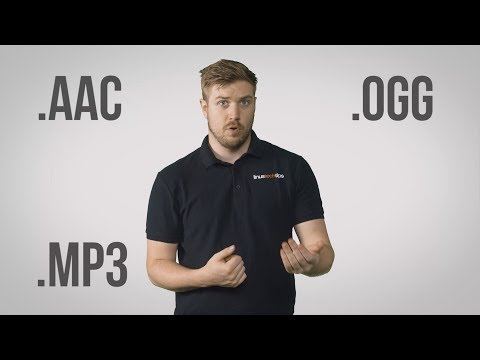

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('WIIKXOrt3bk')


# 헬로우 월드

`! pip install SpeechRecognition` 명령어로 `SpeechRecognition` 라이브러리를 설치한다. 그리고 나서 `speech_recognition` 라이브러리를 불러온다. `recognizer` 객체를 생성시킨다. 데이터는 [OPEN speech repository, American English](http://www.voiptroubleshooter.com/open_speech/american.html)에서 첫번째 파일 `OSR_us_000_0010_8k.wav`을 다운로드 받는다.  [Harvard Sentences](http://www.cs.columbia.edu/~hgs/audio/harvard.html) 웹사이트에서 `.wav` 파일을 녹음한 원본 원고를 확인할 수 있다.

In [18]:
# ! pip install SpeechRecognition
## 환경설정
import speech_recognition as sr

recognizer = sr.Recognizer()
recognizer.energy_threshold = 300

## wav 파일 읽어오기
harvard_audio = sr.AudioFile("data/audio/OSR_us_000_0010_8k.wav")

with harvard_audio as source:
    audio = recognizer.record(source)

recognizer.recognize_google(audio_data=audio, language="en-US")

'the Birch canoe slid on the smooth planks glue the seat to the dark blue background it is easy to tell the depth of a well these days a chicken leg is a verb dish rice is often served in round Bowls the juice of lemons makes fine punch the box was the one beside the pump truck the Hogs are such hot corn and garbage 4 hours of study works'

# 한국어

## CJK - 중국어

다음으로 중국어를 대상으로 동일한 작업을 통해 중국어 텍스트를 추출해보자.

- `OSR_cn_000_0072_8k.wav`
  1.  院子门口不远处就是一个地铁站.
  1.  这是一个美丽而神奇的景象.
  1.  树上长满了又大又甜的桃子.
  1.  海豚和鲸鱼的表演是很好看的节目.
  1.  邮局门前的人行道上有一个蓝色的邮箱.


In [22]:
# 중국어 wav 파일 읽어오기
chinese_audio = sr.AudioFile("data/audio/OSR_cn_000_0072_8k.wav")

with chinese_audio as source:
    mandarin = recognizer.record(source)

recognizer.recognize_google(audio_data=mandarin, language="zh-CN")

'院子门口不远处就是一个地铁站这是一个美丽而神奇的景象树上长满了又大又甜的桃子海豚和鲸鱼的表演是很好看的节目邮局门前的人行道上有一个蓝色的邮箱'

## 한국어 - JTBC

2016년 10월 24이 있었던, 손석희 앵커가 진행한 JTBC 뉴스룸의 "최순실 PC 파일 입수…대통령 연설 전 연설문 받았다"에 포함된 목소리를 추출해서 NLP 분석을 추진해본다. 유튜브에서 오디오를 추출하는데 `MediaHuman`, `Audacity` 소프트웨어를 사용한다.

- [`MediaHuman` - YouTube to MP3 Converter](https://www.mediahuman.com/youtube-to-mp3-converter/)
  - `MediaHuman` 변환기를 다운로드 받은 후에 유튜브 URL을 넣어주면 `.mp3` 파일을 자동으로 생성시켜준다.
- [Free, open source, cross-platform audio software: `Audacity`](https://www.audacityteam.org/)


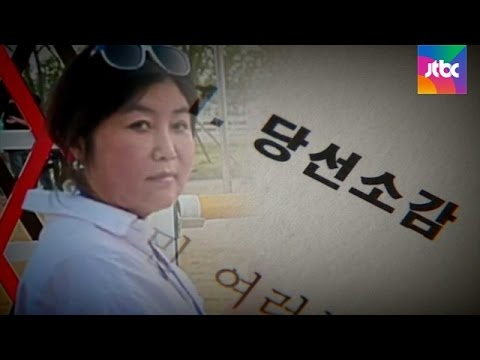

In [23]:
from IPython.display import YouTubeVideo
YouTubeVideo('ZjUlP4bRjUo')

유튜브 동영상을 `.mp3`로 변환시킨 파일음질을 확인해보자. [IPython.display.Audio](https://ipython.org/ipython-doc/dev/api/generated/IPython.display.html#IPython.display.Audio) 기능을 사용해서 유튜브 동영상에서 추출한 `.mp3` 파일음질을 감상할 수 있다.

In [24]:
import IPython
IPython.display.Audio("data/audio/choi.mp3")

`recognize_google()` 메쏘드를 통해 한글을 추출하려면 `.wav` 파일이어야 한다. 이를 위해서 `.mp3` 파일을 `.wav` 파일로 변환시키는 작업을 선행시킨 후에 앞서 영어나 중국어를 추출한 것과 동일한 과정을 거치면 된다.

# 오디오 `dplyr` - `PyDub`

직사각형 데이터를 다루는데 `dplyr`이 있다면, 오디오 데이터를 다루는데는 `PyDub`이 존재한다.
이를 통해서 오디오 데이터를 원하는 형태로 가공하여 후속작업에 활용할 수 있다. 즉, 오디오 데이터 전처리에 꼭 필수적인 도구라고 할 수 있다.

- `.wav` 포맷: `! pip install pydub` 명령어를 사용해서 오디오 전처리 도구를 설치한다.
- `.wav` 포맷 외: `! pip install ffmepg`


`mp3` 파일을 `.wav` 파일로 변환시키는데 `ffmpeg` 도구가 꼭 필요하다. 이를 위해서 [FFMPEG 설치하기 - 윈도우 편](https://m.blog.naver.com/chandong83/221165275268)을 참조하여 설치한다. 설치 방법은 다음과 같다.

1. [FFmpeg Builds](https://ffmpeg.zeranoe.com/builds/) 웹사이트 방문한다.
1. `ffmpeg-4.2.1-win64-static.zip`와 같이 설치 파일을 다운로드 받는다.
1. 앞축을 풀어 윈도우 탐색기에서 적당한 디렉토리에 복사하여 저장시킨다.
1. 제어판 `환경설정`에서 `C:\ffmpeg-4.2.1-win64-static\bin` 경로를 등록시킨다.

In [34]:
# from pydub import AudioSegment

# mp3_file = AudioSegment.from_mp3("data/audio/choi.mp3")
# type(mp3_file)